# How are in-demand skills trending for data analysts

In [45]:
# Step 1: Load the dataset (CSV or DataFrame)
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [ ]:
# Step 2: Filter dataset for 'United States' jobs only and 
# Step 3: Further filter for 'Data Analyst' job title only

df_US_DA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_US_DA.info()

In [ ]:
# Step 4: Extract 'job_posted_month' from the job posting date column (e.g., using pd.to_datetime + .dt.month)
df_US_DA['job_posted_month'] = df_US_DA['job_posted_date'].dt.month
df_US_DA.head()

In [ ]:
# Step 5: Explode the 'job_skills' column to get one skill per row
df_US_DA_exploded = df_US_DA.explode('job_skills')
df_US_DA_exploded.head()

In [49]:
# Step 6: Identify top 5 most frequent job skills for Data Analyst roles in the US
list_top_5_skills = df_US_DA_exploded['job_skills'].value_counts().nlargest(5).index.tolist()
print("Top 5 Skills for Data Analyst Roles in the US:")
print(list_top_5_skills)

Top 5 Skills for Data Analyst Roles in the US:
['sql', 'excel', 'tableau', 'python', 'sas']


In [ ]:
# Step 7: Filter the exploded DataFrame to keep only rows with those top 5 skills
df_top_5_skills = df_US_DA_exploded[df_US_DA_exploded['job_skills'].isin(list_top_5_skills)]
df_top_5_skills.sample(100)

In [51]:
# Step 8: Group by job_posted_month and job_skills → count number of job postings for each skill per month
df_grouped = df_top_5_skills.groupby(['job_posted_month', 'job_skills']).size().reset_index(name='job_postings_count')
df_grouped

,job_posted_month,job_skills,job_postings_count
0,1,excel,3592
1,1,python,2254
2,1,sas,1832
3,1,sql,4601
4,1,tableau,2488
5,2,excel,2587
6,2,python,1618
7,2,sas,1212
8,2,sql,3168
9,2,tableau,1676


In [52]:
# Step 9: Group by job_posted_month to get total number of job postings in that month
df_total_postings = df_US_DA.groupby('job_posted_month').size().reset_index(name='total_job_postings')
df_total_postings

,job_posted_month,total_job_postings
0,1,8494
1,2,6124
2,3,6218
3,4,6049
4,5,4993
5,6,5683
6,7,5201
7,8,6634
8,9,4639
9,10,5271


In [53]:
# Step 10: Merge the two to compute the % of job postings for each skill in each month
df_merged = pd.merge(df_grouped, df_total_postings, on='job_posted_month', suffixes=('_skill', '_total'))
df_merged
# df_merged['percentage'] = (df_merged['job_postings_count'] / df_merged['total_job_postings']) * 100

,job_posted_month,job_skills,job_postings_count,total_job_postings
0,1,excel,3592,8494
1,1,python,2254,8494
2,1,sas,1832,8494
3,1,sql,4601,8494
4,1,tableau,2488,8494
5,2,excel,2587,6124
6,2,python,1618,6124
7,2,sas,1212,6124
8,2,sql,3168,6124
9,2,tableau,1676,6124


In [54]:
# Step 11 calculate the percentage of job postings for each skill in each month
df_merged['percentage'] = (df_merged['job_postings_count'] / df_merged['total_job_postings']) * 100
df_merged


,job_posted_month,job_skills,job_postings_count,total_job_postings,percentage
0,1,excel,3592,8494,42.288674
1,1,python,2254,8494,26.536379
2,1,sas,1832,8494,21.568166
3,1,sql,4601,8494,54.167648
4,1,tableau,2488,8494,29.291264
5,2,excel,2587,6124,42.243632
6,2,python,1618,6124,26.420640
7,2,sas,1212,6124,19.790986
8,2,sql,3168,6124,51.730895
9,2,tableau,1676,6124,27.367734


In [55]:
# Step 11: Create a pivot table where:
#          - rows = months (1 to 12)
#          - columns = top 5 skills
#          - values = percentage of job postings
df_pivot = df_merged.pivot(index='job_posted_month', columns='job_skills', values='percentage').fillna(0)
df_pivot

job_skills,excel,python,sas,sql,tableau
job_posted_month,,,,,
1,42.288674,26.536379,21.568166,54.167648,29.291264
2,42.243632,26.420640,19.790986,51.730895,27.367734
3,42.795111,27.066581,19.909939,51.881634,29.012544
4,42.139197,27.756654,21.524219,53.231939,29.575136
5,42.419387,27.017825,19.467254,51.692369,28.680152
6,41.914482,28.312511,17.314799,50.360725,28.646841
7,40.722938,27.648529,19.150163,50.163430,29.475101
8,41.166717,30.524570,19.234248,51.462165,29.409105
9,38.823022,26.492779,18.452253,49.471869,29.165768


In [82]:
# retrieve first column name from df_pivot
df_pivot.columns[0]

'excel'

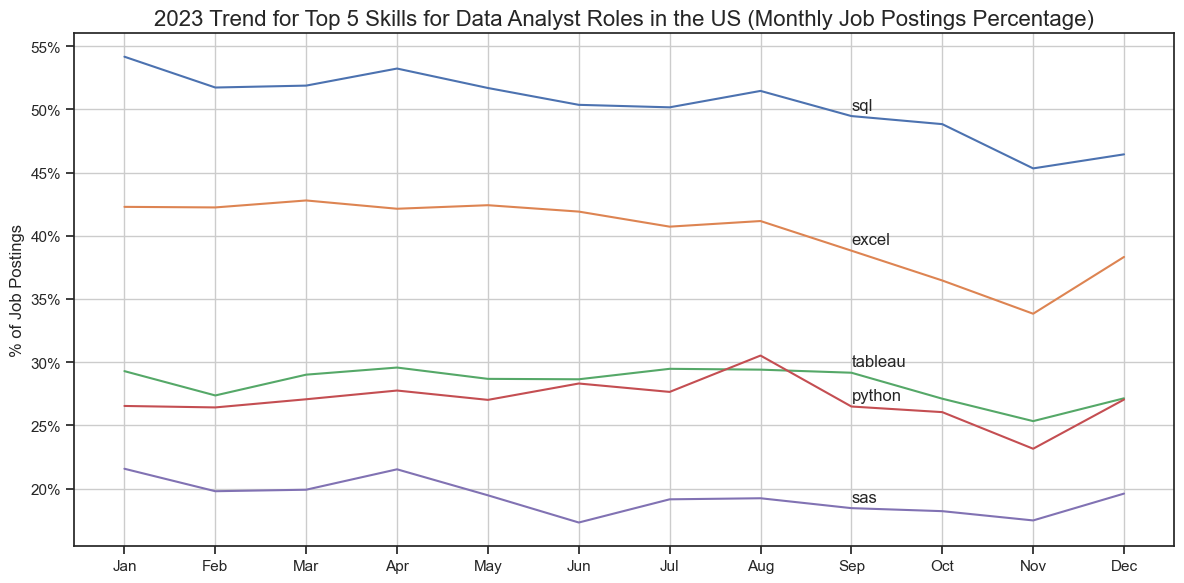

In [94]:
# Step 12: Use Seaborn to plot a line chart (or heatmap) with months on x-axis, % on y-axis, one line per skill
#         - Add title, axis labels, legend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pivot, dashes=False, hue_order=list_top_5_skills)
sns.set_theme(style="ticks")
plt.title('2023 Trend for Top 5 Skills for Data Analyst Roles in the US (Monthly Job Postings Percentage)', fontsize=16)
plt.xlabel('')
plt.ylabel('% of Job Postings')
plt.legend().remove()
for i in range(len(list_top_5_skills)):
    plt.text(x=9, y=df_pivot.iloc[8, i] + 0.5, s=df_pivot.columns[i], fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.grid()
plt.tight_layout()
plt.show()